### Remove scroll from figures

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Extend the size of the Window

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Load Modules

In [3]:
import netCDF4 as nc
import glob
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib as mpl

## Read Sunspot Data and create a multi-index pandas dataframe on year and month

In [4]:
# Define path
histDataPath = '../../data/Sunspot Number/SN_m_tot_V2.0.csv'

# Read SN monthly average file with custom column names
colnames=['year', 'month', 'FracYear', 'SN', 'SNsd', 'NObs', 'prov'] 
SN = pd.read_csv(histDataPath, delimiter=';', names=colnames)
SN['day'] = 15
SN['time'] = pd.to_datetime(SN.loc[:,['year', 'month', 'day']])
SN = SN.set_index('time', drop=True)
SN = SN.to_xarray().convert_calendar("noleap")
SN

<xarray.Dataset>
Dimensions:   (time: 3281)
Coordinates:
  * time      (time) object 1749-01-15 00:00:00 ... 2022-05-15 00:00:00
Data variables:
    year      (time) float64 1.749e+03 1.749e+03 ... 2.022e+03 2.022e+03
    month     (time) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 1.0 2.0 3.0 4.0 5.0
    FracYear  (time) float64 1.749e+03 1.749e+03 ... 2.022e+03 2.022e+03
    SN        (time) float64 96.7 104.3 116.7 92.8 141.7 ... 59.7 78.5 84.1 96.5
    SNsd      (time) float64 -1.0 -1.0 -1.0 -1.0 -1.0 ... 13.1 13.9 15.2 16.0
    NObs      (time) float64 -1.0 -1.0 -1.0 ... 1.277e+03 1.237e+03 1.25e+03
    prov      (time) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 0.0 0.0 0.0 0.0 0.0
    day       (time) float64 15.0 15.0 15.0 15.0 15.0 ... 15.0 15.0 15.0 15.0

## Read CMIP Data

In [5]:
# Define paths
histDataPath = '../../data/CMIP/hist-sol/'
solDataPath = '../../data/CMIP/hist-sol/'

In [6]:
# Find files
histFiles = glob.glob(histDataPath + '*.nc')
solFiles = glob.glob(solDataPath + '*.nc')

### Create variables for hist-sol run

In [7]:

hist_sol = None
for file in solFiles:
    if hist_sol is None:
        hist_sol = xr.open_dataset(file)
    else:
        hist_sol = hist_sol.combine_first(xr.open_dataset(file))
hist_sol

<xarray.Dataset>
Dimensions:    (lat: 90, bnds: 2, lon: 144, time: 468)
Coordinates:
  * time       (time) object 1976-01-16 12:00:00 ... 2014-12-16 12:00:00
    height     float64 2.0
  * lat        (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon        (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Dimensions without coordinates: bnds
Data variables:
    lat_bnds   (lat, bnds) float64 -90.0 -88.0 -88.0 -86.0 ... 88.0 88.0 90.0
    lon_bnds   (lon, bnds) float64 0.0 2.5 2.5 5.0 ... 355.0 357.5 357.5 360.0
    tas        (time, lat, lon) float32 240.5 240.5 240.5 ... 229.0 229.0 229.0
    time_bnds  (time, bnds) object 1976-01-01 00:00:00 ... 2015-01-01 00:00:00
Attributes: (12/48)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            DAMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    contact:                Kenneth Lo (cdkkl@giss.nasa.gov)
    ...                     ...
    title:                  GISS-E2-2-G output prepared for CMIP6
    tracking_id:            hdl:21.14100/ddfde67d-8eea-4da0-94a3-40d33f576707
    variable_id:            tas
    variant_label:          r1i1p3f1
    license:                CMIP6 model data produced by NASA Goddard Institu...
    cmor_version:           3.3.2

### Create variables for hist run

In [8]:
hist_all = None
for file in histFiles:
    if hist_all is None:
        hist_all = xr.open_dataset(file)
    else:
        hist_all = hist_all.combine_first(xr.open_dataset(file))
hist_all

<xarray.Dataset>
Dimensions:    (lat: 90, bnds: 2, lon: 144, time: 468)
Coordinates:
  * time       (time) object 1976-01-16 12:00:00 ... 2014-12-16 12:00:00
    height     float64 2.0
  * lat        (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon        (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Dimensions without coordinates: bnds
Data variables:
    lat_bnds   (lat, bnds) float64 -90.0 -88.0 -88.0 -86.0 ... 88.0 88.0 90.0
    lon_bnds   (lon, bnds) float64 0.0 2.5 2.5 5.0 ... 355.0 357.5 357.5 360.0
    tas        (time, lat, lon) float32 240.5 240.5 240.5 ... 229.0 229.0 229.0
    time_bnds  (time, bnds) object 1976-01-01 00:00:00 ... 2015-01-01 00:00:00
Attributes: (12/48)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            DAMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    contact:                Kenneth Lo (cdkkl@giss.nasa.gov)
    ...                     ...
    title:                  GISS-E2-2-G output prepared for CMIP6
    tracking_id:            hdl:21.14100/ddfde67d-8eea-4da0-94a3-40d33f576707
    variable_id:            tas
    variant_label:          r1i1p3f1
    license:                CMIP6 model data produced by NASA Goddard Institu...
    cmor_version:           3.3.2

## Select a random month, latitude, and longitude and plot

(-8744.5, 5459.5)

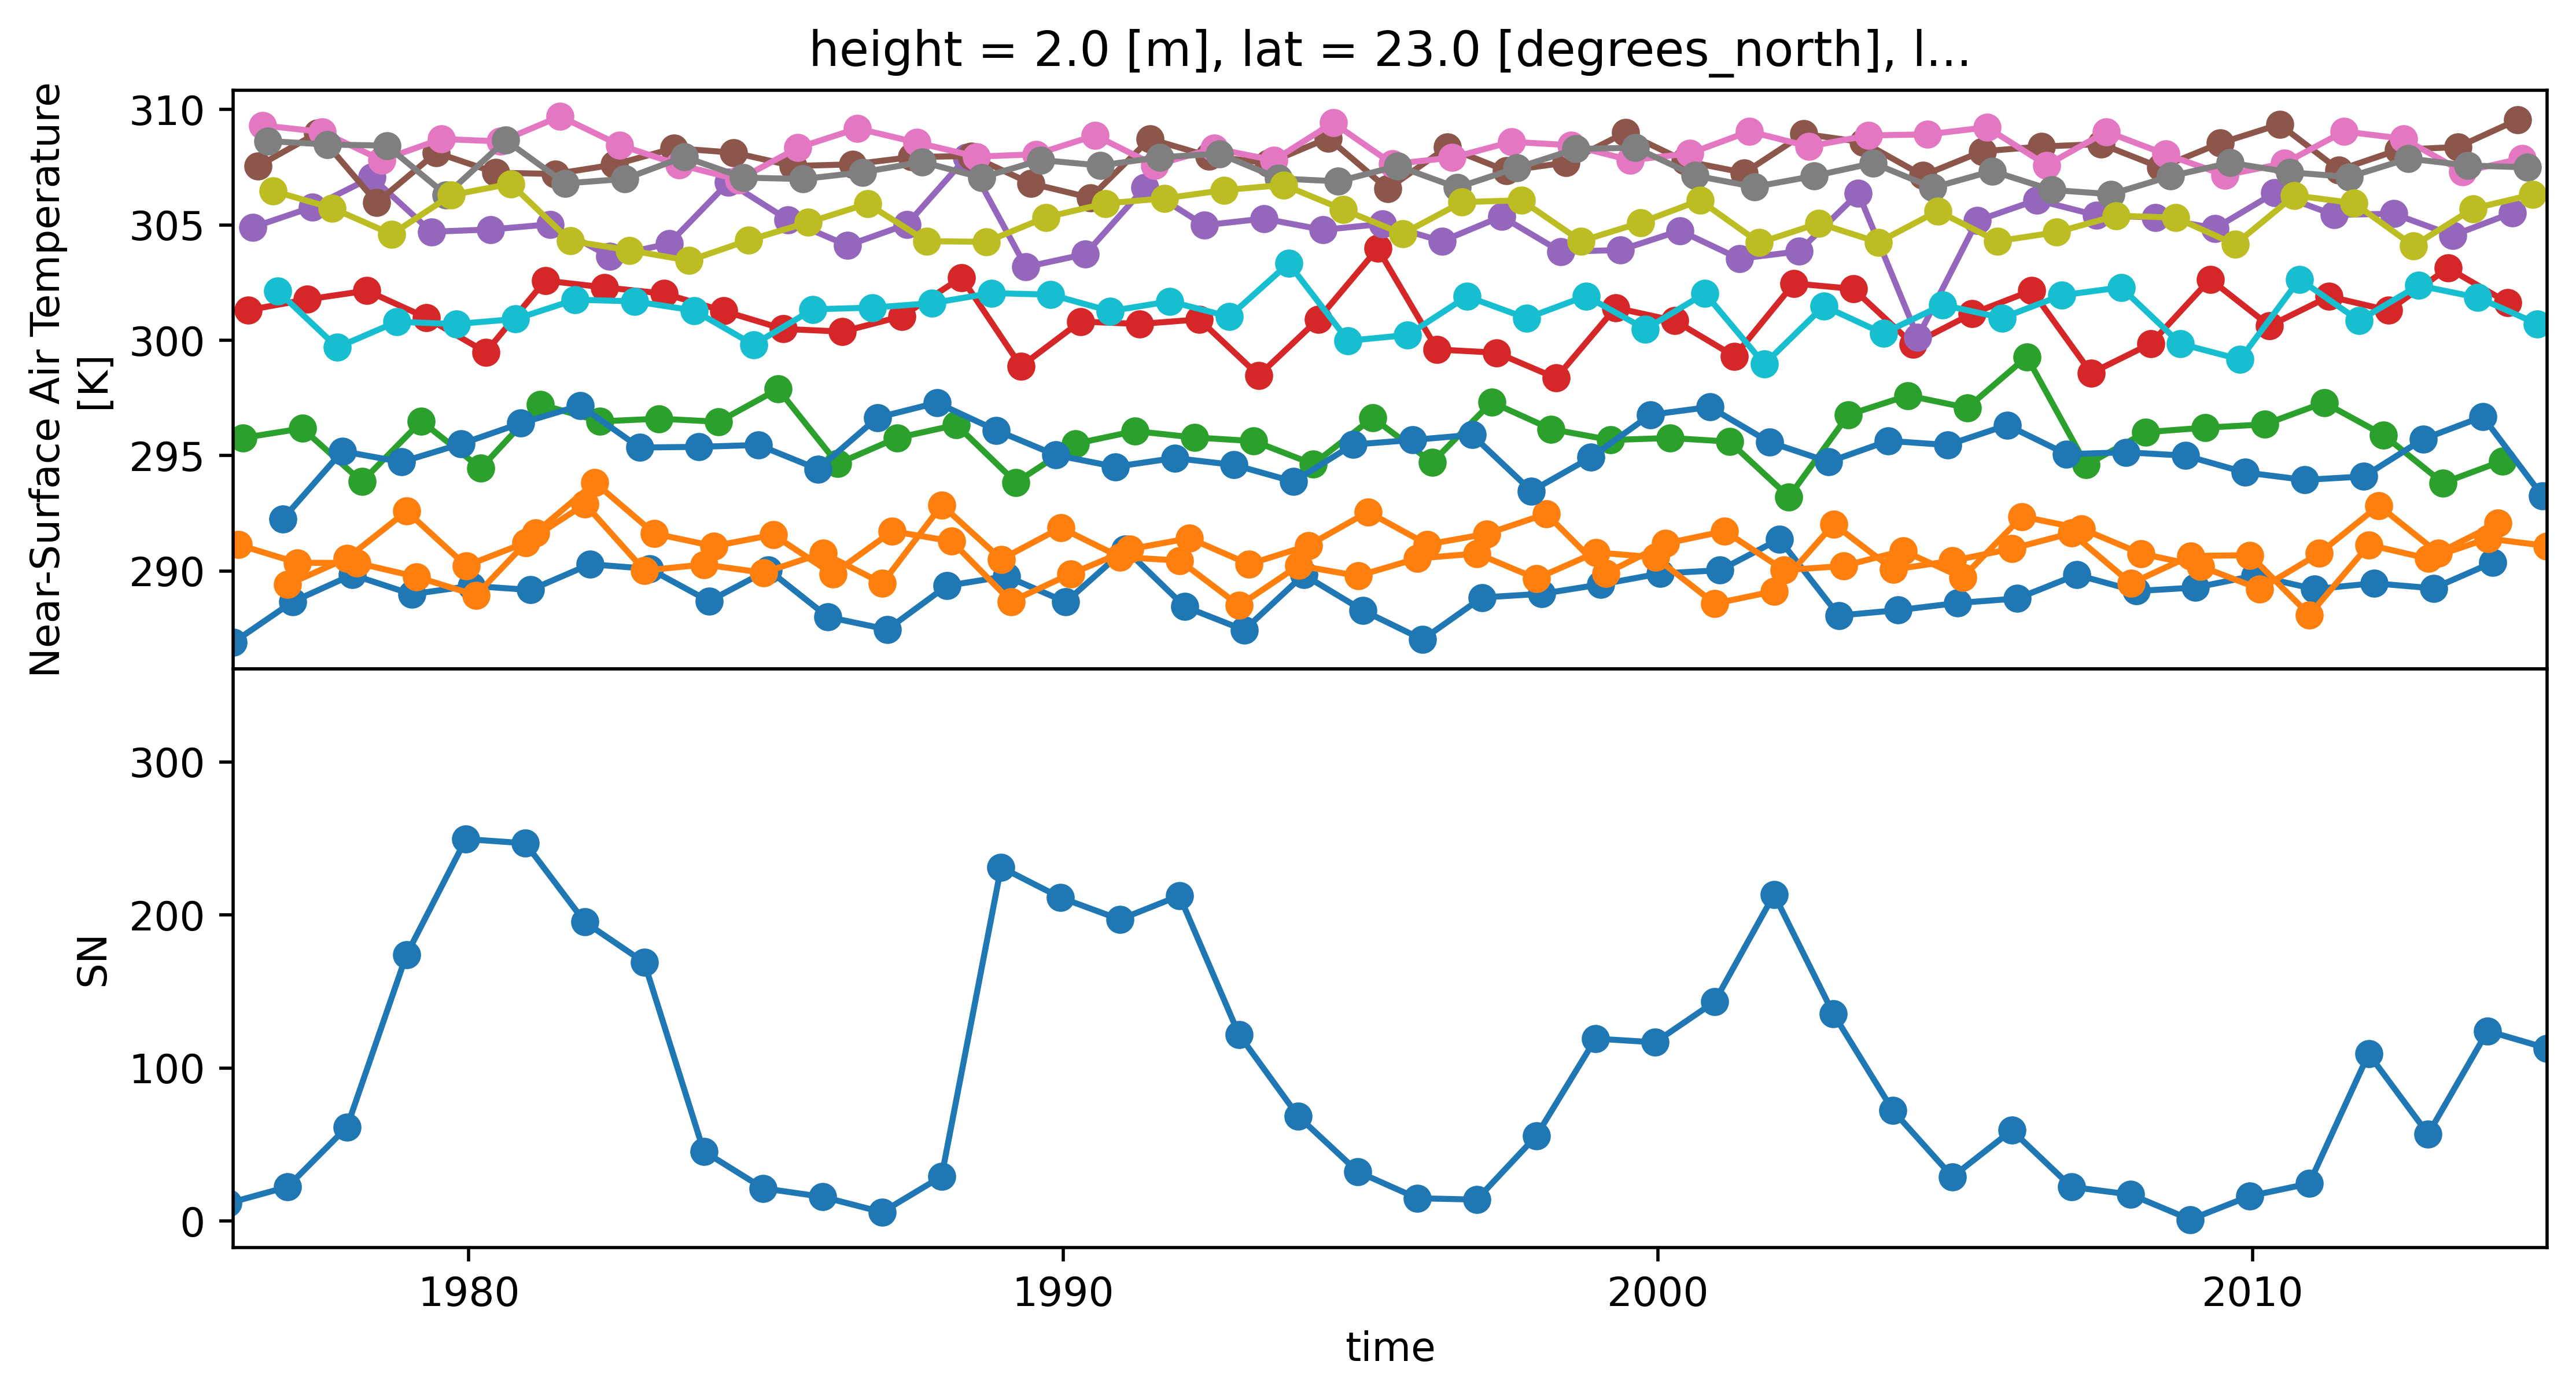

In [10]:
month = np.random.randint(1,12)
lat = hist_sol.lat.data[np.random.randint(0, hist_sol.lat.shape[0]-1)]
lon = hist_sol.lon.data[np.random.randint(0, hist_sol.lon.shape[0]-1)]


fig = plt.figure(figsize=2*np.array([4, 2]), dpi=500)
gs0 = fig.add_gridspec(2, 1, wspace=0.15, hspace=0, left=0, right=1, bottom=0, top=1)

ax = fig.add_subplot(gs0[0, 0])
# sol_slice.plot(ax=ax)


for month in np.arange(1,13):




    sol_slice = hist_sol.groupby('time.month')[month].groupby('lat')[lat].groupby('lon')[lon]['tas']
    all_slice = hist_all.groupby('time.month')[month].groupby('lat')[lat].groupby('lon')[lon]['tas']
    SN_slice = SN.groupby('time.month')[month]['SN']    


    all_slice.plot(ax=ax, marker='o')
    ax.set_xlim([np.min(hist_sol.time.data), np.max(hist_sol.time.data)])


ax = fig.add_subplot(gs0[1, 0])
SN_slice.plot(ax=ax, marker='o')
ax.set_xlim([np.min(hist_sol.time.data), np.max(hist_sol.time.data)])